## Importing libraries

In [ ]:
!pip install hvplot

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [112]:
data = pd.read_csv('/content/USA_Housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [116]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


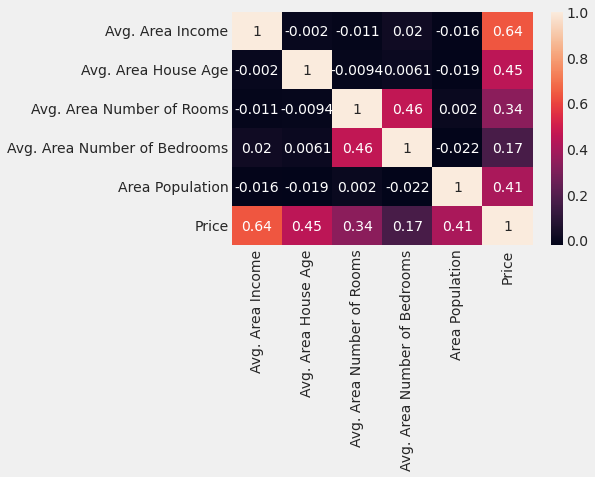

In [117]:
sns.heatmap(data.corr(), annot=True)

## Training a Linear Regression Model

In [118]:
X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

## Train Test Split

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## Preparing Data For Linear Regression

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

## Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

## Model Evaluation

In [124]:
# print the Y intercept
print(lin_reg.intercept_)

1228219.1492415662


In [103]:
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119
Area Population,151252.342377


Interpreatation of the coefficients:

* Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an increase of **$21.52.**

* Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an increase of **$164883.28.**

* Holding all other features fixed, a 1 unit increase in **Avg. Area Number** of Rooms is associated with an increase of **$122368.67.**

* Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an increase of **$2233.80.**

* Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an increase of **$15.15.**

## Predictions from our Model

In [125]:
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).hvplot.scatter(x='True Values', y='Predicted Values')

:Scatter   [True Values]   (Predicted Values)

## Regression Evaluation Metrics

* **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors.
* **Mean Squared Error (MSE)** is the mean of the squared errors.
* **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors. The lower the RMSE better is model performance.
* **R-squared (R2)** is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [126]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Model evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

Model evaluation:
_____________________________________
MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436
R2 Square: 0.9146818498754016
__________________________________


In [127]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,81135.566093,1.006842e+10,100341.529545,0.914682,0.917379
